In [ ]:
#Assignmentarsh

In [7]:
import cv2
import glob
import sys
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os


In [14]:
#This function will be used to read all images from a folder
def loadimages(path):
    images_gray = []
    images_rgb = []
    for filename in os.listdir(path):
        grayimgs = cv2.imread(os.path.join(path,filename),0)
        rgbimgs = cv2.imread(os.path.join(path,filename),1)
        if grayimgs is not None:
            images_gray.append(grayimgs)
        if rgbimgs is not None:
            images_rgb.append(rgbimgs)
    return images_gray,images_rgb


In [15]:
def displayListImages(lstImages):
    import matplotlib.pyplot as plt
    figure, axes = plt.subplots(nrows=3, ncols=3)
    for img in lstImages:
        plt.subplot(3,3,lstImages.index(img)+1)
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.title("Image_0"+str(lstImages.index(img)+1))
    figure.tight_layout()
    figure.show()

In [16]:
images_gray,images_rgb=loadimages("images/")

<ipython-input-15-f0c67d845cf7>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.subplot(3,3,lstImages.index(img)+1)
<ipython-input-15-f0c67d845cf7>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.title("Image_0"+str(lstImages.index(img)+1))
<ipython-input-15-f0c67d845cf7>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


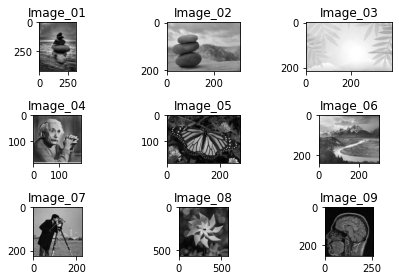

In [17]:
displayListImages(images_gray);

<ipython-input-15-f0c67d845cf7>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.subplot(3,3,lstImages.index(img)+1)
<ipython-input-15-f0c67d845cf7>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.title("Image_0"+str(lstImages.index(img)+1))
<ipython-input-15-f0c67d845cf7>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


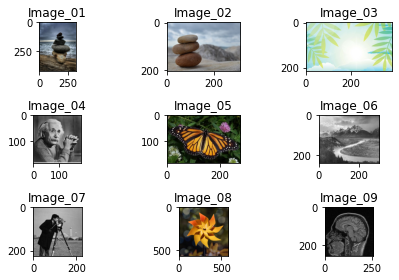

In [18]:
displayListImages(images_rgb);

<ipython-input-15-f0c67d845cf7>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.subplot(3,3,lstImages.index(img)+1)
<ipython-input-15-f0c67d845cf7>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  plt.title("Image_0"+str(lstImages.index(img)+1))
<ipython-input-15-f0c67d845cf7>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


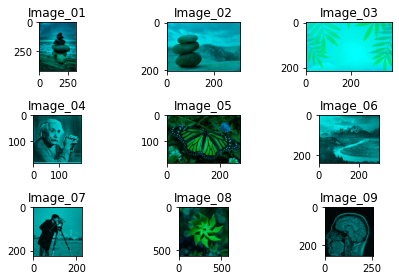

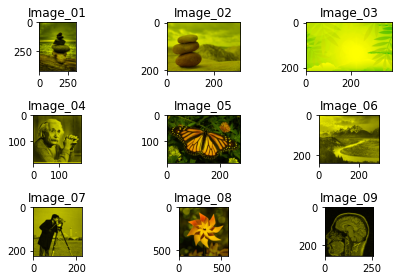

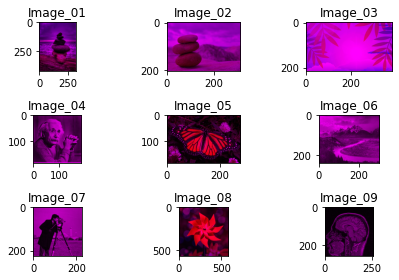

In [19]:
def rgbExclusion(image,exclChannel):
        Excluded_image = image.copy()
        if(exclChannel.lower()=='r'):
            Excluded_image[:,:,2] = 0
        elif(exclChannel.lower()=='g'):
            Excluded_image[:,:,1] = 0
        elif(exclChannel.lower()=='b'):
            Excluded_image[:,:,0] = 0
        return Excluded_image
images_red=[]
images_blue=[]
images_green=[]
for img in images_rgb:
    images_red.append(rgbExclusion(img,'r'))
for img in images_rgb:
    images_blue.append(rgbExclusion(img,'b'))
for img in images_rgb:
    images_green.append(rgbExclusion(img,'g'))
displayListImages(images_red);
displayListImages(images_blue);
displayListImages(images_green);

In [ ]:
#2.3 Histogram below

In [20]:
equ=[]
equ_hist=[]
Gray_hist=[]
for img in images_gray:
    eqh=cv2.equalizeHist(img)
    equ.append(eqh)
    calc=cv2.calcHist(eqh,[0],None,[256],[0,256])
    equ_hist.append(calc)
    Gray_hist.append(cv2.calcHist([img],[0],None,[256],[0,256]))

<ipython-input-24-92aae505894b>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
<ipython-input-24-92aae505894b>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
<ipython-input-24-92aae505894b>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
<ipython-input-24-92aae505894b>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


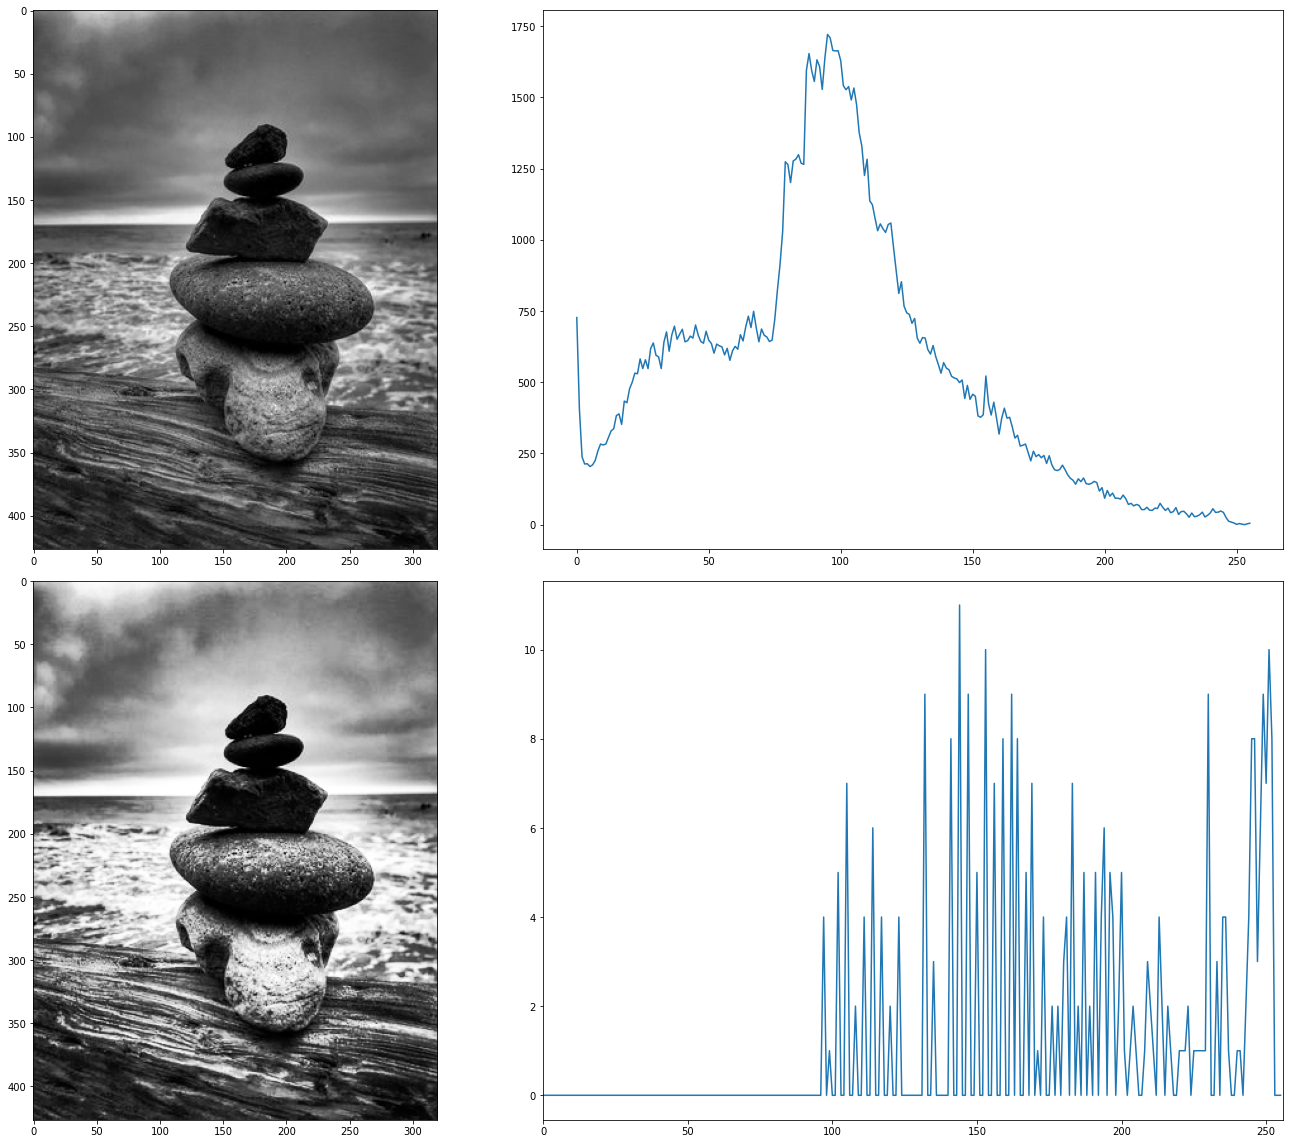

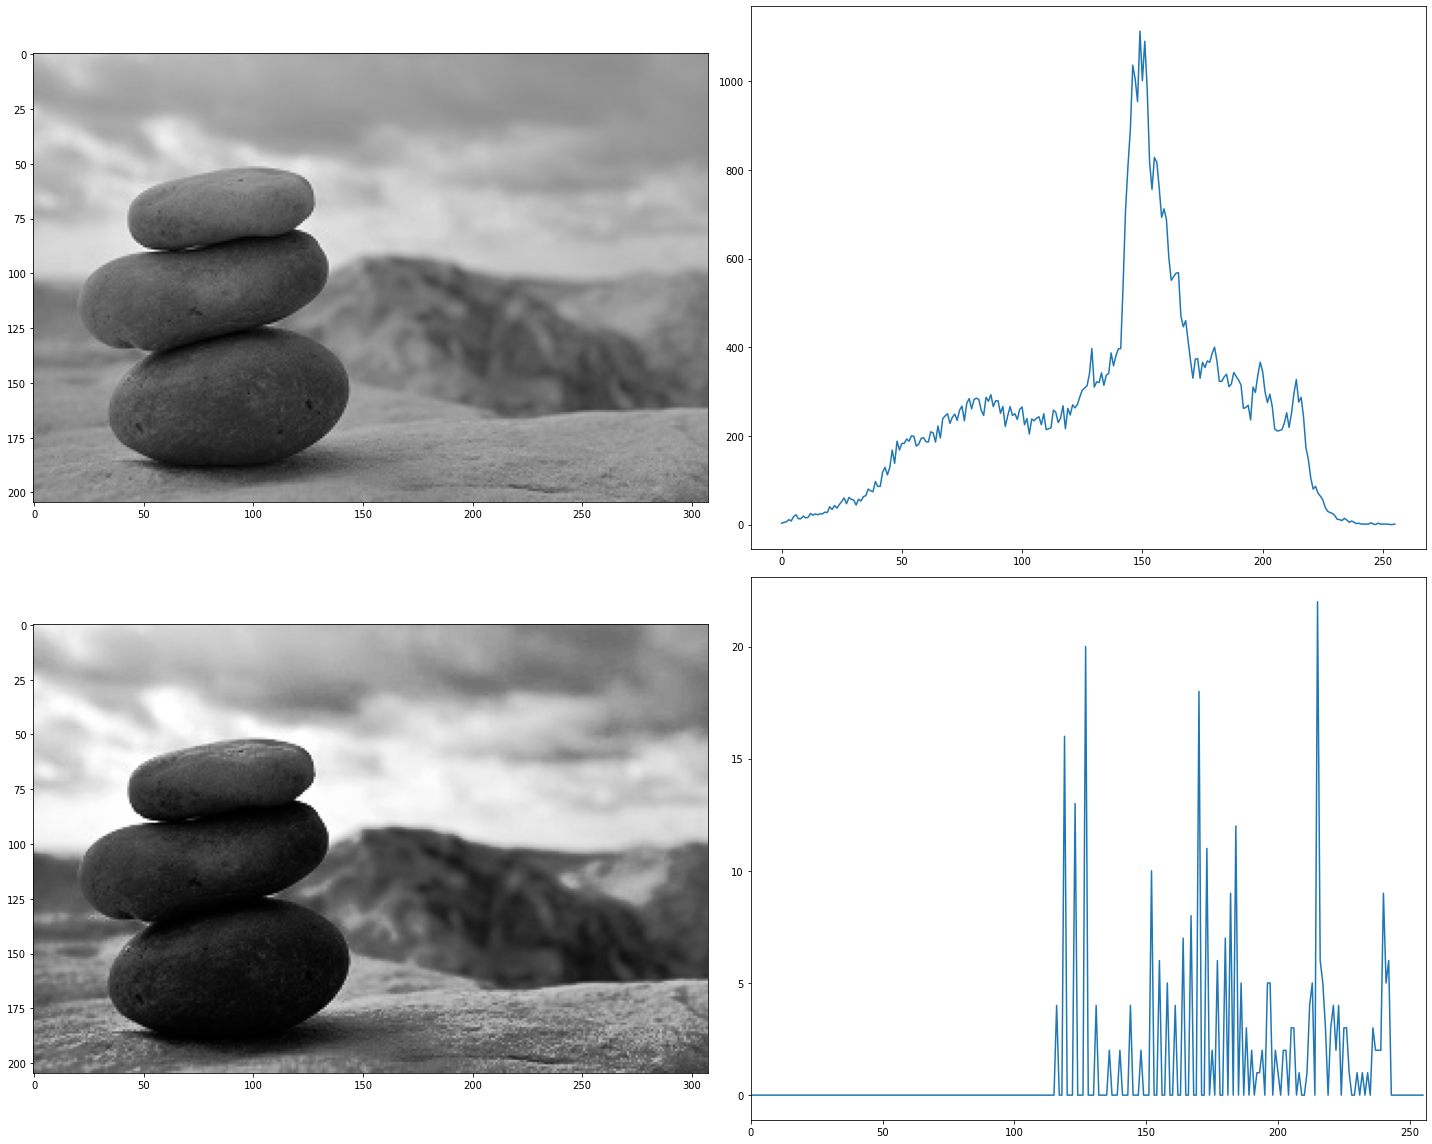

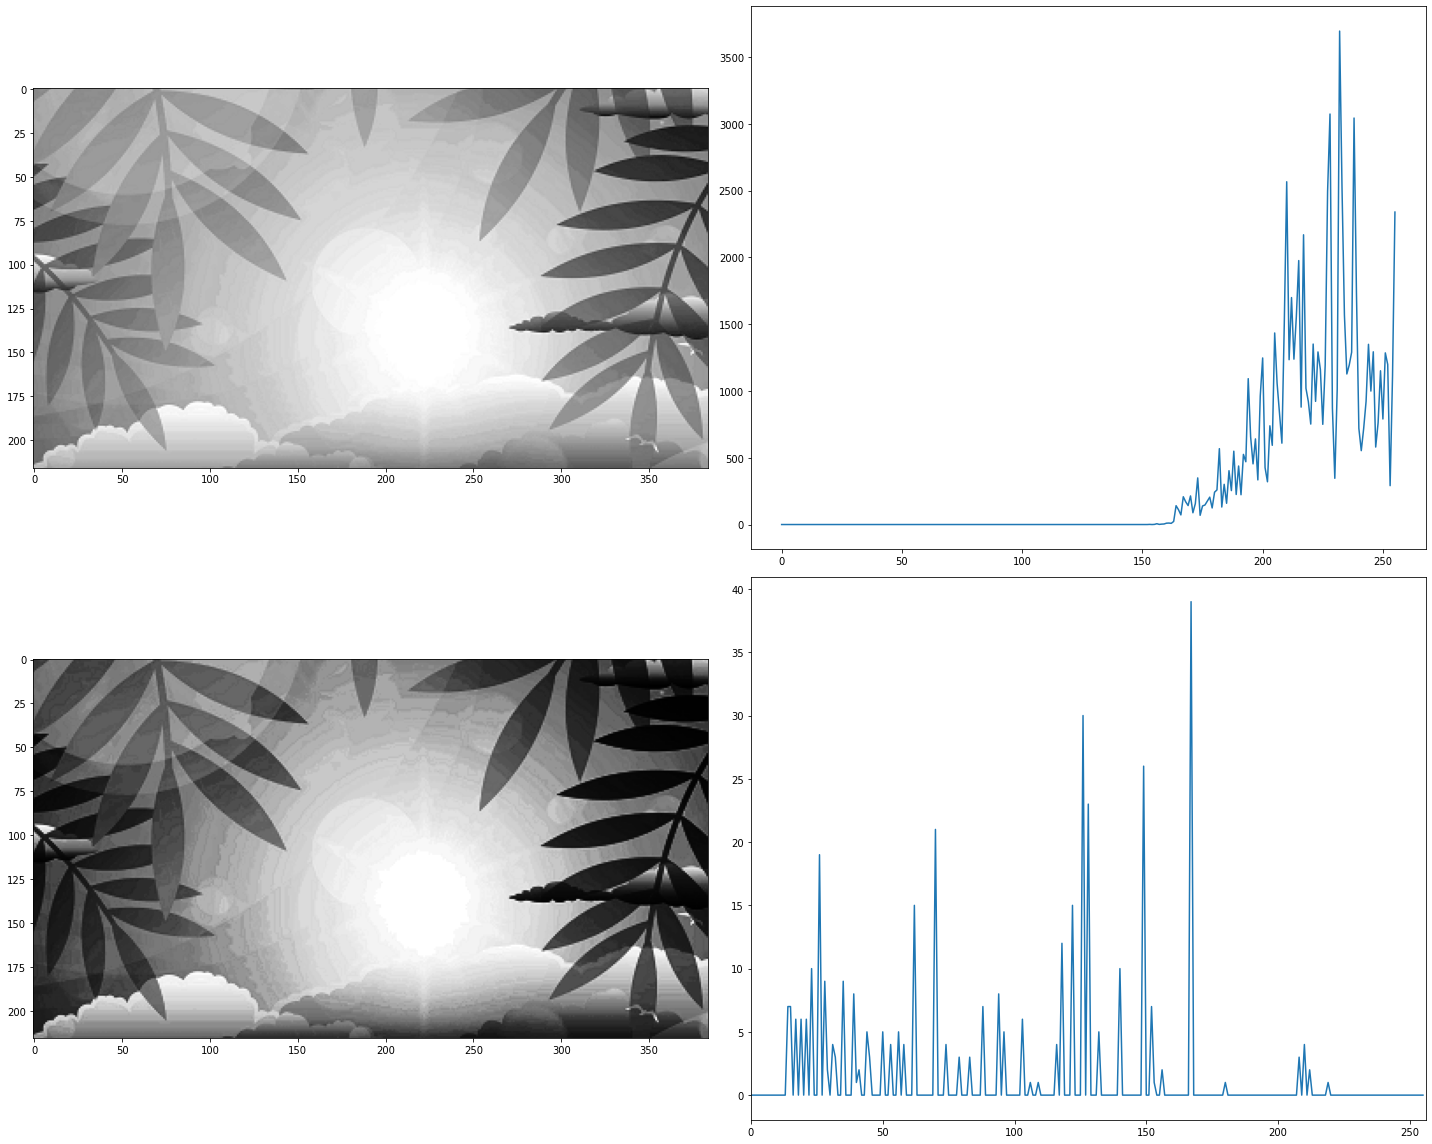

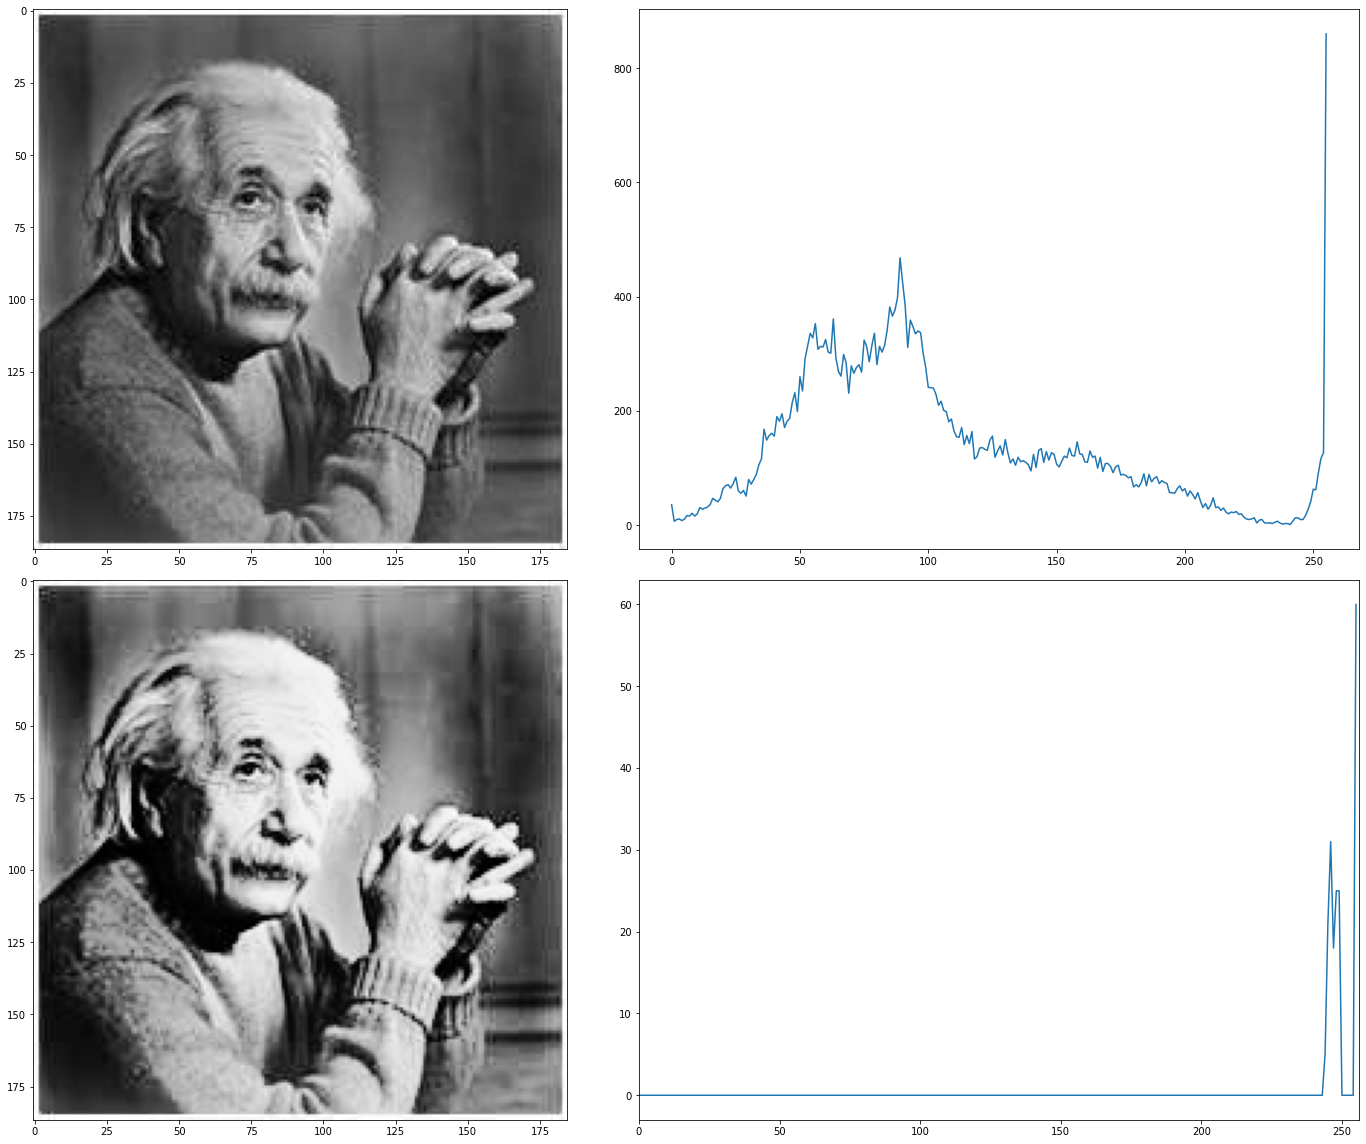

In [24]:
i=0
for i in range(0, 4):
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    figure, axes = plt.subplots(nrows=1, ncols=4)
    plt.subplot(221), plt.imshow(images_gray[i], 'gray')
    plt.subplot(222), plt.plot(Gray_hist[i])
    plt.subplot(223), plt.imshow(equ[i], 'gray')
    plt.subplot(224), plt.plot(equ_hist[i])
    plt.xlim([0,256])
    figure.tight_layout()
    figure.show()
    i=i+1

In [ ]:
#Convolutionbelow

In [25]:
def ConvOperation(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    output = np.zeros_like(image)
    paddedimg = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    paddedimg[1:-1, 1:-1] = image
    for pix_x in range(image.shape[0]):
        for pix_y in range(image.shape[1]):
            output[pix_x,pix_y]=(kernel*paddedimg[pix_x:pix_x+3,pix_y:pix_y+3]).sum()
    return output

<ipython-input-182-ffb7ad198e47>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


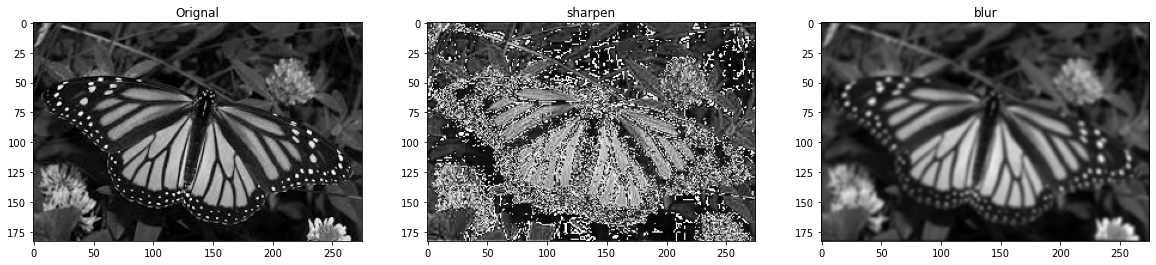

In [182]:
blurkernel = np.ones((3,3),np.float32)/9 #blur
sharpenkernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpen = ConvOperation(images_gray[4],sharpenkernel)
image_blur = ConvOperation(images_gray[4],blurkernel)
image_blur = ConvOperation(image_blur,blurkernel)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(images_gray[4],cmap=plt.cm.gray)
plt.title("Orignal")
fig.add_subplot(3, 3, 2)
plt.imshow(image_sharpen,cmap=plt.cm.gray)
plt.title("sharpen")
fig.add_subplot(3, 3, 3)
plt.imshow(image_blur,cmap=plt.cm.gray)
plt.title("blur")
fig.show()

Text(0.5, 1.0, 'Gaus Flt, sigma=3')

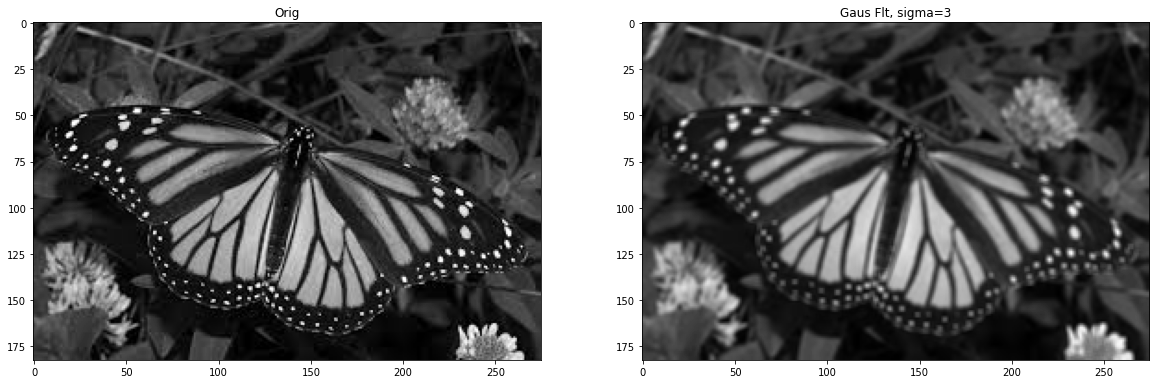

In [184]:
img_gaussianFilter = cv2.GaussianBlur(images_gray[4], (3,3),sigmaX=3)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(images_gray[4],cmap=plt.cm.gray)
plt.title("Orig")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaus Flt, sigma=3")

Text(0.5, 1.0, 'Median Filter')

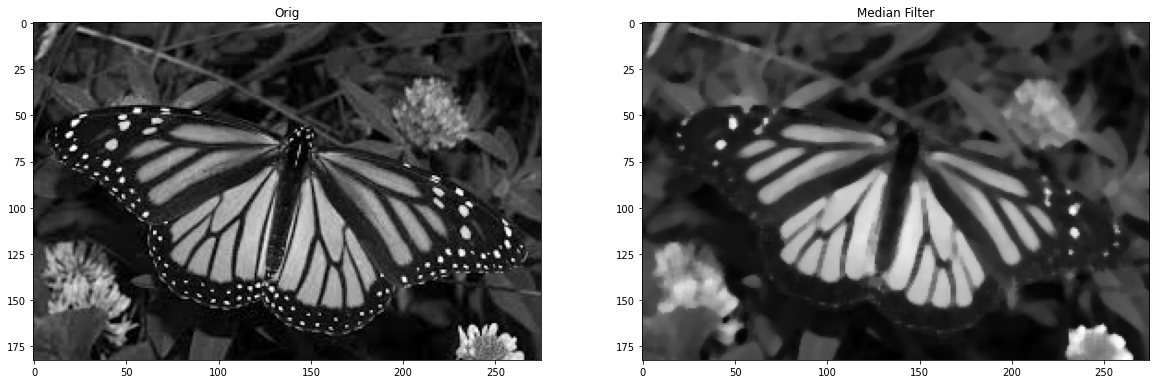

In [185]:
img_med = cv2.medianBlur(images_gray[4],5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(images_gray[4],cmap=plt.cm.gray)
plt.title("Orig")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("Median Filter")


<ipython-input-187-ccfc1a8c396e>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


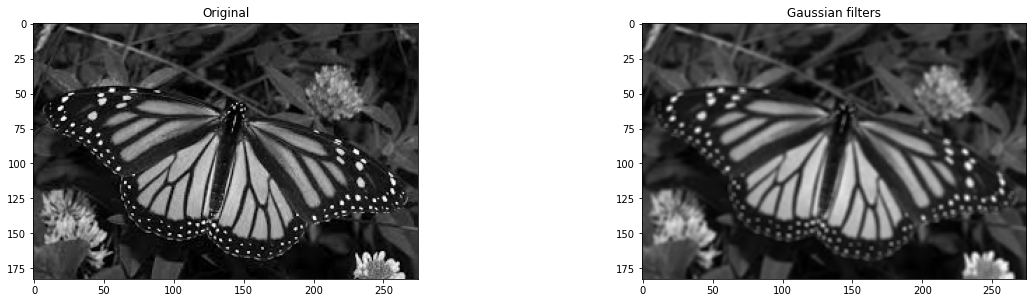

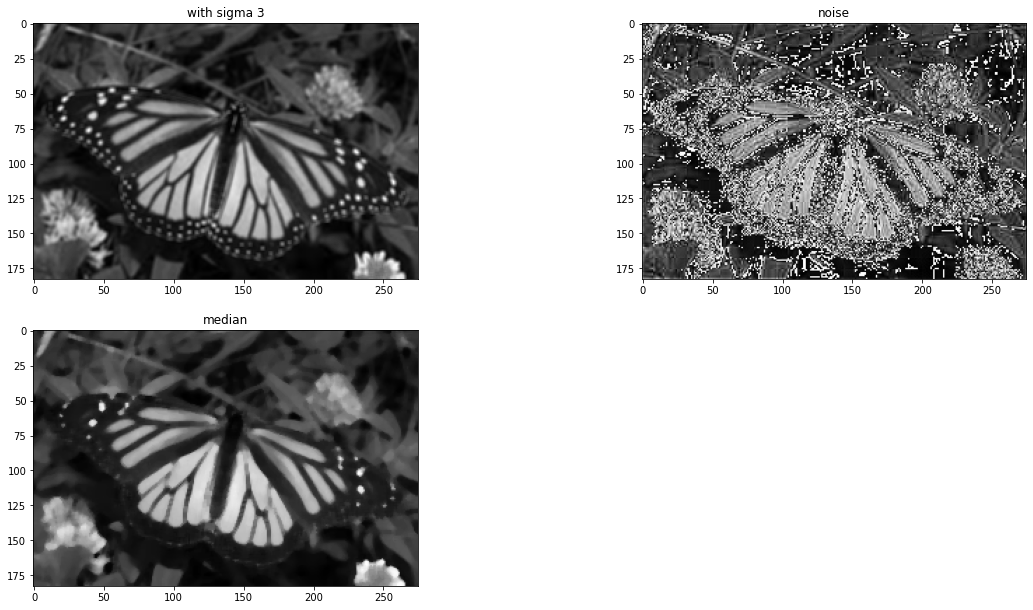

In [187]:
img_med = cv2.medianBlur(images_gray[4],5)
fig = plt.figure()
fig.add_subplot(3, 2, 1)
plt.imshow(images_gray[4],cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(3, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian filters")
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(3, 2, 3)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("with sigma 3")
fig.add_subplot(3, 2, 4)
plt.imshow(image_sharpen,cmap=plt.cm.gray)
plt.title("noise")
fig.add_subplot(3, 2, 5)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("median")
fig.show()

In [198]:
def Grad(img,laplacian,sobelX,sobelY):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (18.0, 16.0)
    fig = plt.figure()
    fig.add_subplot(2, 2, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 2, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")
    img_SobelX = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (18.0, 16.0)
    fig.add_subplot(2, 2, 3)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (18.0, 16.0)
    fig.add_subplot(2, 2, 4)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")

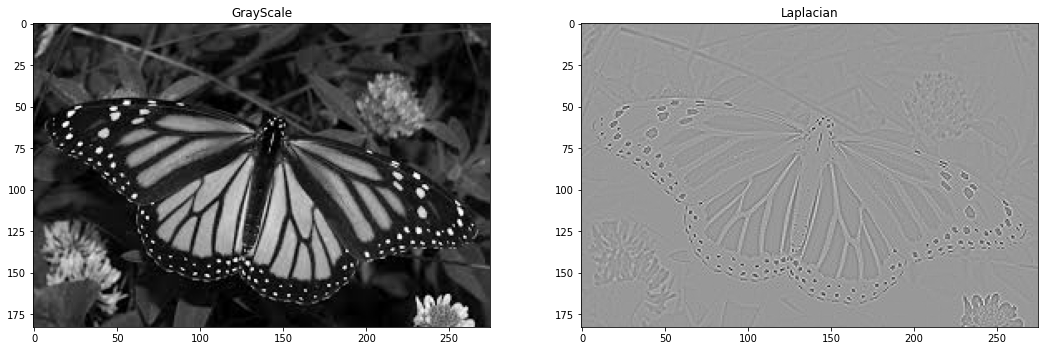

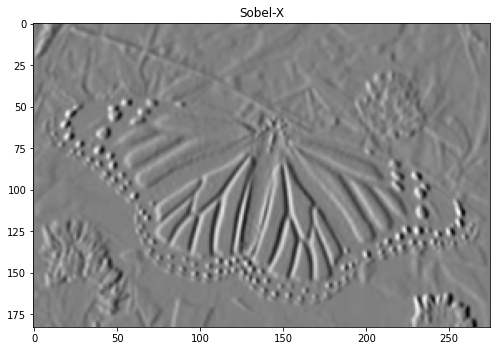

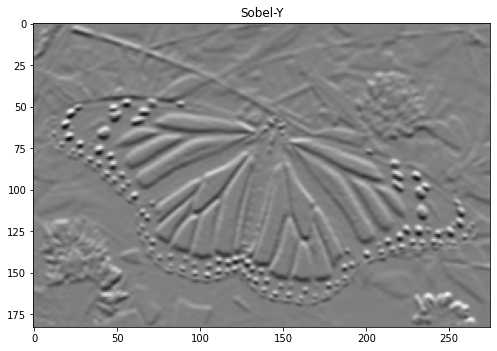

In [195]:
laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")
Grad(images_gray[4],laplacian,sobelX,sobelY)

Text(0.5, 1.0, 'Canny edge detector')

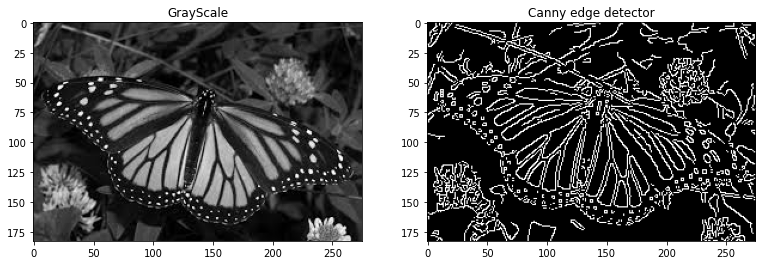

In [199]:
edges = cv2.Canny(images_gray[4], 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(images_gray[4],cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")

In [ ]:
#Bonus Part
import cv2
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 10, 70)
    ret, mask = cv2.threshold(canny, 70, 255, cv2.THRESH_BINARY)
    cv2.imshow('Video feed', mask)
    if cv2.waitKey(1) == 13:
        break
cap.release()
cv2.destroyAllWindows()